In [1]:
import numpy as np

In [2]:
def objfun(fenotipo):
    Nind, Nvar = fenotipo.shape
    objv = np.zeros((Nind, 1))
    for i in range(Nind):
        objv[i, 0] = 21.5 + fenotipo[i, 0] * np.sin(4 * np.pi * fenotipo[i, 0]) + fenotipo[i, 1] * np.sin(20 * np.pi *fenotipo[i, 1])
    return objv

In [3]:
# Valores de las variables
Nind = 100
Lind = 33
Pc = 0.9
Pm = 0.01
Maxgen = 1000
Nvar = 2
rango = np.array([[-3, 4.1], [12.1, 5.8]])

In [4]:
def creapob(Nind, Lind):
    return np.random.randint(0, 2, size=(Nind, Lind))

In [5]:
def decodifica(genotipo, rango):
    Nvar = rango.shape[1]
    Nind, Lind = genotipo.shape
    Lvar = Lind // Nvar
    potencias = 2 ** np.arange(Lvar)
    fenotipo = np.zeros((Nind, Nvar))
    for i in range(Nind):
        for j in range(Nvar):
            
            fenotipo[i, j] = np.sum(potencias * genotipo[i, (j * Lvar):(j * Lvar + Lvar)])
    for i in range(Nvar):
        fenotipo[:, i] = rango[i, 0] + ((rango[i, 1] - rango[i, 0]) / (2 ** Lvar - 1)) * fenotipo[:, i]
    return fenotipo

In [6]:
def rankeo(objv, direccion):
    SP = 2
    Nind, Nobj = objv.shape
    aptitud = np.zeros((Nind, 1))
    if direccion == 1:
        nuevo_objv = np.sort(objv, axis=0)
    else:
        nuevo_objv = np.sort(-1 * objv, axis=0)
        
    apt = 2 - SP + 2 * (SP - 1) * (np.arange(Nind) / (Nind - 1))
    posori = np.argsort(nuevo_objv, axis=0)
    aptitud[posori, 0] = apt.reshape(-1, 1)
    return aptitud

In [7]:
def ruleta(genotipo, fenotipo, aptitud):
    Nind, aux = aptitud.shape
    total = np.sum(aptitud)
    probabilidad = aptitud / total
    acumulada = np.cumsum(probabilidad)
    idx = np.zeros((Nind, 1), dtype=int)
    for i in range(Nind):
        selecciona = np.random.rand()
        aux = np.where(acumulada >= selecciona)[0]
        idx[i, 0] = aux[0]
        
    nuevo_gen = genotipo[idx.flatten(), :]
    return nuevo_gen

In [8]:
def xunpunto(nuevo_gen, Pc):
    Nind, Lind = nuevo_gen.shape
    aux_gen = np.zeros((Nind, Lind))
    par = Nind % 2
    for i in range(0, Nind - 1, 2):
        cruza = np.random.rand()
        if cruza <= Pc:
            corte = np.random.randint(0, Lind - 1)
            aux_gen[i, :] = np.concatenate((nuevo_gen[i, :corte], nuevo_gen[i + 1, corte:]))
            aux_gen[i + 1, :] = np.concatenate((nuevo_gen[i + 1, :corte], nuevo_gen[i, corte:]))
        else:
            aux_gen[i, :] = nuevo_gen[i, :]
            aux_gen[i + 1, :] = nuevo_gen[i + 1, :]
    if par == 1:
        aux_gen[Nind - 1, :] = nuevo_gen[Nind - 1, :]
        nuevo_gen = aux_gen
    return nuevo_gen

In [9]:
def muta(nuevo_gen, Pm):
    Nind, Lind = nuevo_gen.shape
    valores = np.random.rand(Nind, Lind)
    muta = valores <= Pm
    nuevo_gen = np.logical_xor(nuevo_gen, muta)
    return nuevo_gen

In [10]:
genotipo = creapob(Nind, Lind)
fenotipo = decodifica (genotipo, rango);
generaciones = 1

In [11]:
Mejor = np.full((Maxgen, 1), np.nan) #Referencia al mejor valor óptimo encontrado de la función objetivo
Mejor_cromosoma = np.zeros((Maxgen, Lind)) # Mejor valor (nodo) encontrado por cada generación
objv = objfun(fenotipo) #evaluación de la función

In [12]:
generaciones = 1
#Numero de generaciones predefinidas
while generaciones < Maxgen: 
     #cada generación se establece el fitness para cada solución encontrada
    aptitud = rankeo(objv, 1)
    nuevo_gen = ruleta(genotipo, fenotipo, aptitud)
    nuevo_gen = xunpunto(nuevo_gen, Pc)
    nuevo_gen = muta(nuevo_gen, Pm)
    nuevo_feno = decodifica(nuevo_gen, rango)
    nuevo_objv = objfun(nuevo_feno)
    genotipo = nuevo_gen
    objv = nuevo_objv
    idx = np.argmax(objv)
    Mejor[generaciones] = objv[idx]
    Mejor_cromosoma[generaciones, :] = genotipo[idx, :]
    generaciones += 1

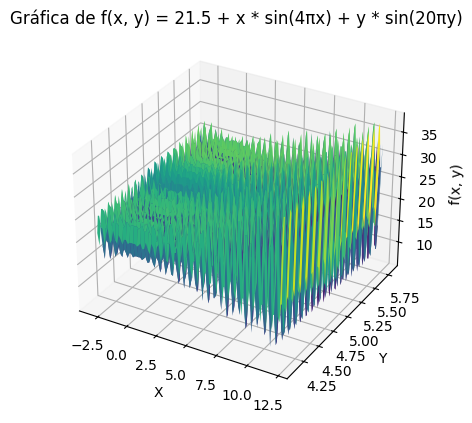

In [13]:
import matplotlib.pyplot as plt
# Definir la función
def f(x, y):
    return 21.5 + x * np.sin(4 * np.pi * x) + y * np.sin(20 * np.pi * y)

# Generar datos para x y y
x = np.linspace(-3, 12.1, 100)
y = np.linspace(4.1,5.8, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Crear la gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfica de f(x, y) = 21.5 + x * sin(4πx) + y * sin(20πy)')
# Mostrar la gráfica
plt.show()
